In [16]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
class LogisticRegression(object):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.W = np.random.normal(size=(input_dim, output_dim))
        self.b = np.zeros(output_dim)
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        return softmax(np.matmul(x, self.W) + self.b)
    
    def compute_gradients(self, x, t):
        y = self.forward(x)
        delta = y-t
        dW = np.matmul(x.T, delta)
        db = np.matmul(np.ones(x.shape[0]), delta)
        return dW, db
    
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims = True)

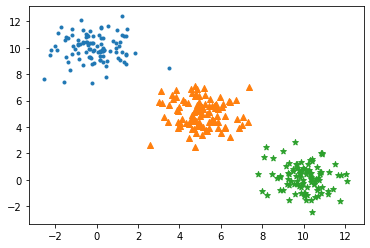

In [18]:
M = 2      #入力データの次元
K = 3      #クラス数
n = 100 #クラスごとのデータ数
N = n*K #全データ数

x1 = np.random.randn(n, M) + np.array([0, 10])
x2 = np.random.randn(n, M) + np.array([5, 5])
x3 = np.random.randn(n, M) + np.array([10, 0])
t1 = np.array([[1, 0, 0] for i in range(n)])
t2 = np.array([[0, 1, 0] for i in range(n)])
t3 = np.array([[0, 0, 1] for i in range(n)])

x = np.concatenate((x1, x2, x3), axis=0)
t = np.concatenate((t1, t2, t3), axis=0)
plt.scatter(x1[:, 0], x1[:, 1],marker='.')
plt.scatter(x2[:, 0], x2[:, 1],marker='^')
plt.scatter(x3[:, 0], x3[:, 1],marker='*')
plt.show()

In [19]:
model = LogisticRegression(input_dim=M, output_dim=K)

In [20]:
def compute_loss(t, y):
    return (-t * np.log(y)).sum(axis=1).mean()

def train_step(x, t):
    dW, db = model.compute_gradients(x, t)
    model.W = model.W - 0.1 * dW
    model.b = model.b - 0.1 * db
    loss = compute_loss(t, model(x))
    return loss

epochs = 10
batch_size = 50
n_batches = x.shape[0] // batch_size

for epoch in range(epochs):
    train_loss = 0.
    x_, t_ = shuffle(x, t)
    
    for n_batch in range(n_batches):
        start = n_batch * batch_size
        end = start + batch_size
        
        train_loss += train_step(x_[start: end], t_[start: end])
    if epoch % 10 == 0 or epoch == epochs-1:
        print('epoch: {}, loss: {:.3f}'.format(epoch+1, train_loss))

epoch: 1, loss: 152.542
epoch: 10, loss: 0.000


In [22]:
x_, t_ = shuffle(x, t)
preds = model(x_[0:5])
classified = np.argmax(t_[0:5], axis=1) == np.argmax(preds[0:5], axis=1)
print('Prediction matched: ', classified)

Prediction matched:  [ True  True  True  True  True]


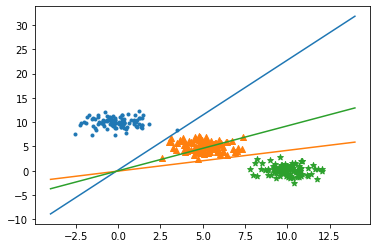

In [30]:
xx = np.linspace(-4, 14, 1800)
yy = ((model.W[0, 1]-model.W[0,0]) * xx + model.b[1] - model.b[0]) / (model.W[1, 0]-model.W[1,1])
plt.plot(xx, yy)
yy = ((model.W[0, 2]-model.W[0,1]) * xx + model.b[2] - model.b[1]) / (model.W[1, 1]-model.W[1,2])
plt.plot(xx, yy)
yy = ((model.W[0, 2]-model.W[0,0]) * xx + model.b[2] - model.b[0]) / (model.W[1, 0]-model.W[1,2])
plt.plot(xx, yy)
plt.scatter(x1[:, 0], x1[:, 1],marker='.')
plt.scatter(x2[:, 0], x2[:, 1],marker='^')
plt.scatter(x3[:, 0], x3[:, 1],marker='*')
plt.show()
